In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp

In [3]:
filePath = "/home/ubuntu/ookla-statcan-analysis-neutron-1/data/processed/statistical_geometries/LastFourQuartersOrBestEstimate_On_DissolvedSmallerCitiesHexes.gpkg"
data = gp.read_file(filePath)

In [4]:
data.head()

,PCPUID,HEXUID_PCPUID,PRCODE,PCNAME,PCCLASS,Pop2016,TDwell2016_TLog2016,URDwell2016_RH2016,PHH_Count,Common_Type,...,unique_devices,ave_devices_per_tile,num_tiles,Down_50_percentile,Up_10_percentile,ookla_50_10_percentile,min_year,max_year,connections,geometry
0,100792,NL47580528-100792,NL,St. John's,4,9896.147562,5058.332094,4318.056742,685.0,3.0,...,1517.0,6.772321,224.0,89.732143,96.428571,89.732143,Q4 2021,Q3 2022,fixed,"MULTIPOLYGON (((-52.78788 47.56551, -52.78288 ..."
1,100792,NL47580529-100792,NL,St. John's,4,4252.819048,1648.265873,1558.259524,437.0,4.0,...,341.0,2.005882,170.0,91.764706,95.294118,91.764706,Q4 2021,Q3 2022,fixed,"POLYGON ((-52.90996 47.56425, -52.90990 47.564..."
2,100792,NL47430528-100792,NL,St. John's,4,2662.527342,1056.284918,1025.692964,149.0,3.0,...,90.0,3.333333,27.0,100.000000,100.000000,100.000000,Q4 2021,Q3 2022,fixed,"POLYGON ((-52.76428 47.45587, -52.76436 47.454..."
3,100792,NL47510528-100792,NL,St. John's,4,24029.650382,10449.110393,9692.839561,1684.0,3.0,...,1889.0,5.689759,332.0,93.373494,98.192771,93.373494,Q4 2021,Q3 2022,fixed,"POLYGON ((-52.79738 47.49030, -52.79781 47.490..."
4,100792,NL47510529-100792,NL,St. John's,4,9484.733870,3792.755213,3563.152336,909.0,4.0,...,762.0,2.964981,257.0,94.552529,98.054475,94.552529,Q4 2021,Q3 2022,fixed,"POLYGON ((-52.91007 47.51346, -52.91014 47.513..."


In [5]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 60275 entries, 0 to 60274
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   PCPUID                        1832 non-null   object  
 1   HEXUID_PCPUID                 60275 non-null  object  
 2   PRCODE                        60275 non-null  object  
 3   PCNAME                        1832 non-null   object  
 4   PCCLASS                       1832 non-null   object  
 5   Pop2016                       60275 non-null  float64 
 6   TDwell2016_TLog2016           60275 non-null  float64 
 7   URDwell2016_RH2016            60275 non-null  float64 
 8   PHH_Count                     54660 non-null  float64 
 9   Common_Type                   54660 non-null  float64 
 10  Pop2016_at_50_10_Combined     60275 non-null  float64 
 11  TDwell2016_at_50_10_Combined  60275 non-null  float64 
 12  URDwell_at_50_10_Combined     60275 no

PCCLASS
2    921
4    853
3     58
Name: count, dtype: int64


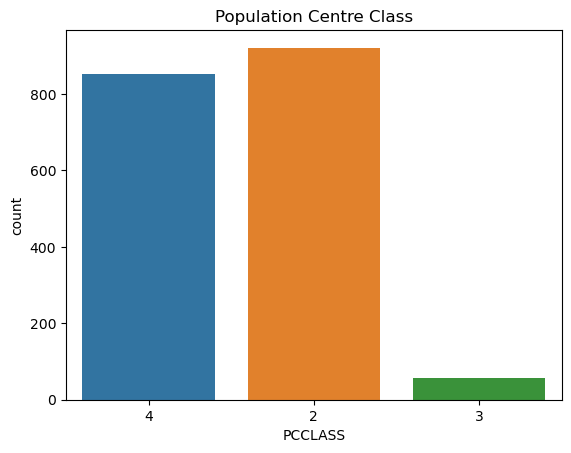

In [6]:
sns.countplot(data=data, x="PCCLASS").set(title="Population Centre Class")
print(data.PCCLASS.value_counts())

In [9]:
data['PCCLASS'].unique()

array(['4', '2', '3', nan], dtype=object)

Text(0.5, 1.0, 'Average Upload Speed Based on Population Centre Class')

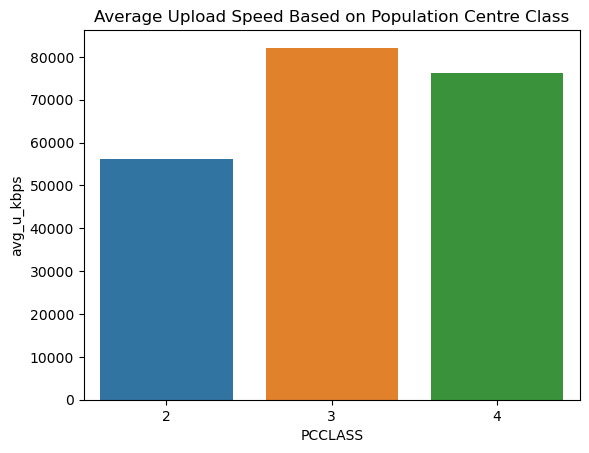

In [18]:
#the average upload speed for each pclass
avg_speed = data.groupby('PCCLASS')['avg_u_kbps'].mean().reset_index()
sns.barplot(x='PCCLASS', y='avg_u_kbps', data=avg_speed)
plt.title('Average Upload Speed Based on Population Centre Class')

In [31]:
data['PCCLASS'].isna().sum()

58443

In [33]:
data['PCCLASS'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
60270     True
60271     True
60272     True
60273     True
60274     True
Name: PCCLASS, Length: 60275, dtype: bool

In [ ]:
#the average upload speed for each pclass
avg_speed = data.groupby('PCCLASS')['avg_u_kbps'].mean().reset_index()
sns.barplot(x='PCCLASS', y='avg_u_kbps', data=avg_speed)
plt.title('Average Upload Speed Based on Population Centre Class')